### Sparks Funds Investment analysis assignment
Spark Funds, an asset management company wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively

#### Importing the necessary python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the files for analysis
Reading and storing the companies, investment rounds and sector mapping datasets into pandas dataframes using the ANSI encoding, as these files contains certain special characters that cannot be read by ISO-8859-1 encoding

In [2]:
companies = pd.read_csv("D:/Upgrad-AI & ML/Investment Assignment/companies.txt", sep="\t", encoding = "ANSI")
rounds2 = pd.read_csv("D:/Upgrad-AI & ML/Investment Assignment/rounds2.csv",encoding = "ANSI")
mapping = pd.read_csv("D:/Upgrad-AI & ML/Investment Assignment/mapping.csv",encoding = "ANSI")

#### Pre-processing the rounds2 & companies datasets

In [3]:
# Converting the company unique id 'permalink' & 'company_permalink' to lowercase in both the companies & rounds2 datasets
companies.loc[:,'permalink'] = companies['permalink'].str.lower()
rounds2.loc[:,'company_permalink'] = rounds2['company_permalink'].str.lower()

#### Finding out the number of unique companies in rounds2 & companies files

In [4]:
print("The number of unique companies in rounds2 are: " + str(len(rounds2['company_permalink'].unique().tolist())))
print("The number of unique companies in companies database are: " + str(len(companies['permalink'].unique().tolist())))

The number of unique companies in rounds2 are: 66368
The number of unique companies in companies database are: 66368


#### Finding out if there any companies in the rounds2 file which are not  present in companies file

In [5]:
rounds2_companies_merge = pd.merge(rounds2[['company_permalink']], companies[['permalink']], 
                                   how = 'left', left_on = 'company_permalink', right_on = 'permalink')
print("No. of companies not present in companies dataset: " + str(rounds2_companies_merge['permalink'].isnull().sum()))
rounds2_companies_merge.loc[rounds2_companies_merge['permalink'].isnull(),:]

No. of companies not present in companies dataset: 0


,company_permalink,permalink


#### Creating a merged master dataset out of rounds2 and companies datasets

In [6]:
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')

# Finding out number of observations in the master dataframe
len(master_frame)

114949

In [7]:
# Finding out percatage null values in each column of the merged dataset
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [8]:
# Dropping funding_round_code column having 73% of null values
master_frame = master_frame.drop('funding_round_code', axis=1)

In [9]:
# Removing rows having null values in the raised_amount_usd column
master_frame = master_frame.loc[~master_frame['raised_amount_usd'].isnull(),:]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

In [10]:
# Creating a dataset grouped by various funding types
funding_by_segment = master_frame.groupby('funding_round_type')

In [11]:
# Finding out average investment across various funding types
funding_by_segment.raised_amount_usd.mean()

funding_round_type
angel                    9.586945e+05
convertible_note         1.453439e+06
debt_financing           1.704353e+07
equity_crowdfunding      5.383682e+05
grant                    4.300576e+06
non_equity_assistance    4.112031e+05
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
private_equity           7.330859e+07
product_crowdfunding     1.363131e+06
secondary_market         7.964963e+07
seed                     7.198180e+05
undisclosed              1.924237e+07
venture                  1.174895e+07
Name: raised_amount_usd, dtype: float64

#### Plot showing the fraction of total investments (globally) in venture, seed, and private equity, & average amount of investment in each funding type

C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


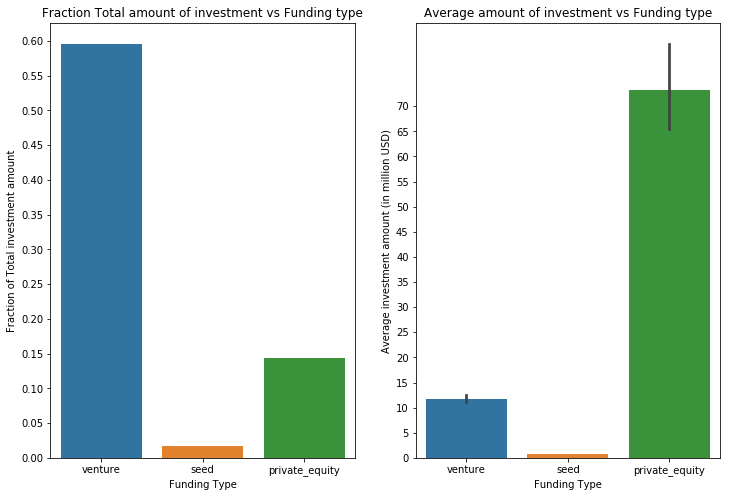

In [12]:
# Creating a Angel, venture and Private equity investments dataset with investment amount in $ millions
funding_type_list = ['venture','seed','private_equity']
venture_fund_frame = master_frame[master_frame['funding_round_type'].isin(funding_type_list)]
venture_fund_frame['raised_amount_usd'] = round(venture_fund_frame['raised_amount_usd']/1000000,2)
total_investment = round(sum(master_frame['raised_amount_usd'])/1000000,2)
venture_fund_frame['fraction_amount_of_investment'] = venture_fund_frame['raised_amount_usd']/total_investment

# Plotting the Angel, Venture and Private equity investments
plt.figure(1,figsize=(12, 8))
plt.subplot(121)
plt.title('Fraction Total amount of investment vs Funding type')
plt.yticks(np.arange(0, 1, 0.05))
plot1 = sns.barplot(x='funding_round_type', y='fraction_amount_of_investment', data=venture_fund_frame, estimator=sum, ci=None)
plot1.set(xlabel='Funding Type', ylabel='Fraction of Total investment amount')

plt.subplot(122)
plt.title('Average amount of investment vs Funding type')
plt.yticks(np.arange(0, 75, 5))
plot2 = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=venture_fund_frame, estimator=np.mean)
plot2.set(xlabel='Funding Type', ylabel='Average investment amount (in million USD)')

plt.show()

In [13]:
# Extracting Venture type investments from the master dataframe
venture_fund_frame = master_frame[master_frame['funding_round_type']=='venture']
# Removing rows having null values in country_code column of the master dataframe
venture_fund_frame = venture_fund_frame.loc[~venture_fund_frame['country_code'].isnull(),:]

In [14]:
# Finding out the top-9 countries in terms of total amount of Venture type investments in the World
funding_by_country = venture_fund_frame.groupby('country_code')
funding_by_country.raised_amount_usd.sum().sort_values(ascending=False).head(9)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [363]:
# Creating a list of the top 9 countries in terms of total amount of Venture investments
top9_list = funding_by_country.raised_amount_usd.sum().sort_values(ascending=False).head(9).index.tolist()

In [364]:
# Creating a dataset of the top 9 countries in terms of total amount of Venture investments
top9 = venture_fund_frame[venture_fund_frame['country_code'].isin(top9_list)]

#### Plot showing the top 9 countries against the total amount of investments of funding type Venture
This will make the top 3 countries very clear

C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


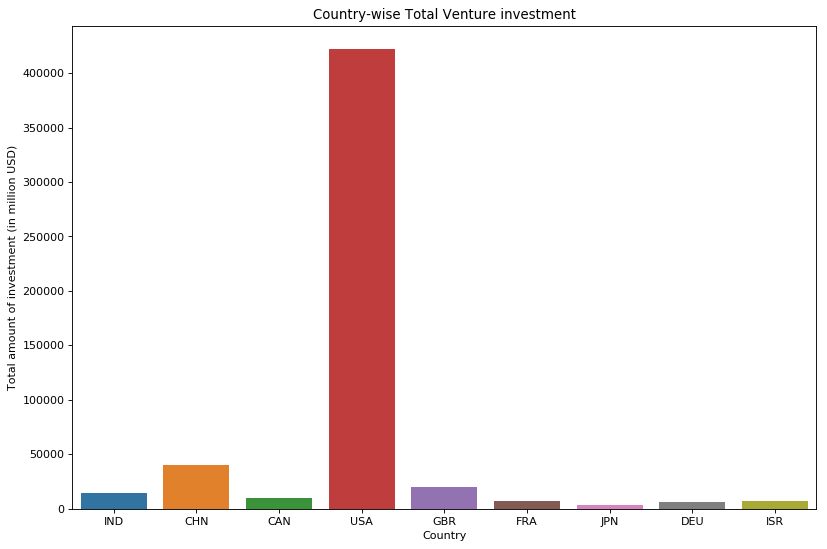

In [365]:
# Creating a Plot showing the top 9 countries against the total amount of investments of funding type Venture
top9_plot = top9
top9_plot['raised_amount_usd_millions'] = round(top9_plot['raised_amount_usd']/1000000,2)
                                                
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Country-wise Total Venture investment')
plot3 = sns.barplot(x='country_code', y='raised_amount_usd_millions', data=top9, estimator=sum, ci=None)
plot3.set(xlabel='Country', ylabel='Total amount of investment (in million USD)')
plt.show()

In [15]:
# Removing the rows having null value in the category_list column of the master dataframe
master_frame = master_frame[~master_frame['category_list'].isnull()]

In [16]:
# Extracting the primary sector from category_list column of the master dataframe
sector_list = list(master_frame['category_list'])
master_frame['primary_sector'] = list(map(lambda x: str(x).split('|',1)[0],sector_list))

C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Pre-processing the mapping dataset removing the blank column and removing rows having no primary sector
mapping = mapping.drop('Blanks', axis = 1)
mapping = mapping[~mapping['category_list'].isnull()]

# Replacing '0' with 'na' in the primary sector column values of the mapping dataset
mapping['category_list'] = list(map(lambda x:x.replace('0','na'),list(mapping['category_list'])))

In [18]:
# Adding the main sector against the primary sector in the mapping dataset (column having '1' against the primary sector)
mapping['main_sector'] = mapping.apply(lambda x:list(mapping.columns[x==1])[0], axis = 1)

In [19]:
# Converting the primary sector to lower case in master and mapping dataframes to facilitate better mapping
mapping['category_list'] = mapping['category_list'].str.lower()
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()

C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Creating a merged master dataframe with main sector mapped against primary sector
master_frame = pd.merge(master_frame, mapping[['category_list','main_sector']], how = 'left', 
                        left_on = 'primary_sector', right_on = 'category_list')

In [21]:
# Removing the rows having null values in the main sector column of the merged master dataframe
master_frame = master_frame[~master_frame['main_sector'].isnull()]

In [22]:
# Renaming column names for the merged master data frame with main sectors mapped as a column from the mapping file
master_frame = master_frame.drop('category_list_y', axis=1)
master_frame = master_frame.rename(columns = {"category_list_x": "category_list"})

#### Finding out No. and Amount of investments in USA, UK and India

In [23]:
# Creating three dataframes for USA, UK and India Venture funding investments between $5-15 mmillion
d1 = master_frame[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'USA')
                 & ((master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000))]
d2 = master_frame[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'GBR')
                 & ((master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000))]
d3 = master_frame[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'IND')
                 & ((master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000))]

In [24]:
# Finding out No. and Amount of investments for USA, UK and India
print('Total number of Investments in USA is {}, UK is {} and India is {}'
      .format(d1['raised_amount_usd'].count(),d2['raised_amount_usd'].count(),d3['raised_amount_usd'].count()))
print('Total amount of Investments in USA is {}, UK is {} and India is {}'
      .format(d1['raised_amount_usd'].sum(),d2['raised_amount_usd'].sum(),d3['raised_amount_usd'].sum()))

Total number of Investments in USA is 12063, UK is 621 and India is 328
Total amount of Investments in USA is 107757097294.0, UK is 5379078691.0 and India is 2949543602.0


#### Finding out the highest investment sectors in USA, UK and India
This has been done through the following simple steps:
1. Grouping the USA, UK and India datasets on main sectors
2. Finding out the top sectors (in terms of No. of Venture funding investments between $5-15 millions) in USA, UK and India

In [25]:
# Creating sector-wise grouped dataframes for USA, UK and India
d1_sectorwise = d1.groupby('main_sector')
d2_sectorwise = d2.groupby('main_sector')
d3_sectorwise = d3.groupby('main_sector')

In [26]:
# Adding No. of investments in the sector as a column to the USA, UK and India datasets
d1 = pd.merge(d1,d1_sectorwise.raised_amount_usd.count(), on = 'main_sector', how = 'left')
d1 = d1.rename(columns = {'raised_amount_usd_y':'no. of investments','raised_amount_usd_x':'raised_amount_usd'})
d2 = pd.merge(d2,d2_sectorwise.raised_amount_usd.count(), on = 'main_sector', how = 'left')
d2 = d2.rename(columns = {'raised_amount_usd_y':'no. of investments','raised_amount_usd_x':'raised_amount_usd'})
d3 = pd.merge(d3,d3_sectorwise.raised_amount_usd.count(), on = 'main_sector', how = 'left')
d3 = d3.rename(columns = {'raised_amount_usd_y':'no. of investments','raised_amount_usd_x':'raised_amount_usd'})

In [27]:
# Adding Total amount of investment in the sector as a column to the USA, UK and India datasets
d1 = pd.merge(d1,d1_sectorwise.raised_amount_usd.sum(), on = 'main_sector', how = 'left')
d1 = d1.rename(columns = {'raised_amount_usd_y':'amount of investments','raised_amount_usd_x':'raised_amount_usd'})
d2 = pd.merge(d2,d2_sectorwise.raised_amount_usd.sum(), on = 'main_sector', how = 'left')
d2 = d2.rename(columns = {'raised_amount_usd_y':'amount of investments','raised_amount_usd_x':'raised_amount_usd'})
d3 = pd.merge(d3,d3_sectorwise.raised_amount_usd.sum(), on = 'main_sector', how = 'left')
d3 = d3.rename(columns = {'raised_amount_usd_y':'amount of investments','raised_amount_usd_x':'raised_amount_usd'})

In [28]:
d1_sectorwise.raised_amount_usd.count().sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [380]:
d2_sectorwise.raised_amount_usd.count().sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [29]:
d3_sectorwise.raised_amount_usd.count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

#### Finding out the highest investment companies (in terms of amount of investment) in the most invested sectors in USA, UK and India
This has been done through the following simple steps:
1. Creating 3 seperate dataframes for the most heavily invested sectors in USA, UK and India respectively
2. Finding out the top-5 firms (in terms of amount of Venture funding investment between $5-15 millions) for the most heavily invested sectors in USA, UK and India

In [30]:
# Creating 3 seperate dataframes for the most heavily invested sectors in USA, UK and India respectively
# As found out earlier this sector is Others for USA, UK and India
d1_companywise1 = d1[(d1.main_sector == 'Others')]
d1_companywise1 = d1_companywise1.groupby('company_permalink')
d2_companywise1 = d2[(d2.main_sector == 'Others')]
d2_companywise1 = d2_companywise1.groupby('company_permalink')
d3_companywise1 = d3[(d3.main_sector == 'Others')]
d3_companywise1 = d3_companywise1.groupby('company_permalink')

In [31]:
# Finding out the top-5 firms in USA from Others sector in terms of Venture funding between $5-15 millions
d1_companywise1.raised_amount_usd.sum().sort_values(ascending=False).head(5)

company_permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [32]:
# Finding out the top-5 firms in UK from Others sector in terms of Venture funding between $5-15 millions
d2_companywise1.raised_amount_usd.sum().sort_values(ascending=False).head(5)

company_permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [33]:
# Finding out the top-5 firms in India from Others sector in terms of Venture funding between $5-15 millions
d3_companywise1.raised_amount_usd.sum().sort_values(ascending=False).head(5)

company_permalink
/organization/firstcry-com        39000000.0
/organization/myntra              38000000.0
/organization/commonfloor         32900000.0
/organization/pepperfry-com       28000000.0
/organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

#### Finding out the highest investment companies (in terms of amount of investment) in the second most invested sectors in USA, UK and India
This has been done through the following simple steps:
1. Creating 3 seperate dataframes for the second most heavily invested sectors in USA, UK and India respectively
2. Finding out the top-5 firms (in terms of amount of Venture funding investment between $5-15 millions) for the second most heavily invested sectors in USA, UK and India

In [34]:
# Creating 3 seperate dataframes for the second most heavily invested sectors in USA, UK and India respectively
# As found out earlier these sectors are Social, Finance, Analytics, Advertising for USA & UK and India

d1_companywise2 = d1[(d1.main_sector == 'Social, Finance, Analytics, Advertising')]
d1_companywise2 = d1_companywise2.groupby('company_permalink')
d2_companywise2 = d2[(d2.main_sector == 'Social, Finance, Analytics, Advertising')]
d2_companywise2 = d2_companywise2.groupby('company_permalink')
d3_companywise2 = d3[(d3.main_sector == 'Social, Finance, Analytics, Advertising')]
d3_companywise2 = d3_companywise2.groupby('company_permalink')

In [35]:
# Finding out the top-5 firms in USA from Social, Finance, Analytics, Advertising sector in terms of Venture funding between $5-15 millions
d1_companywise2.raised_amount_usd.sum().sort_values(ascending=False).head(5)

company_permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
/organization/netbase        60600000.0
/organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

In [36]:
# Finding out the top-5 firms in UK from Social, Finance, Analytics, Advertising sector in terms of Venture funding between $5-15 millions 
d2_companywise2.raised_amount_usd.sum().sort_values(ascending=False).head(5)

company_permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [38]:
# Finding out the top-5 firms in India from Social, Finance, Analytics, Advertising sector in terms of Venture funding between $5-15 millions 
d3_companywise2.raised_amount_usd.sum().sort_values(ascending=False).head(5)

company_permalink
/organization/manthan-systems               50700000.0
/organization/komli-media                   28000000.0
/organization/shopclues-com                 25000000.0
/organization/intarvo                       21900000.0
/organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

#### Creating a plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for Venture investment type)
Plot is created by executing the following basic steps:
1. Create dataframes of top-3 countries comprising of no. of investments in top-3 sectors (in terms of no. of investments)
2. Create a single dataframe with no. of investments in top-3 sectors of all the top-3 countries
3. Plot a bar graph of the No. of investments in the top-3 sectors of top-3 investment countries

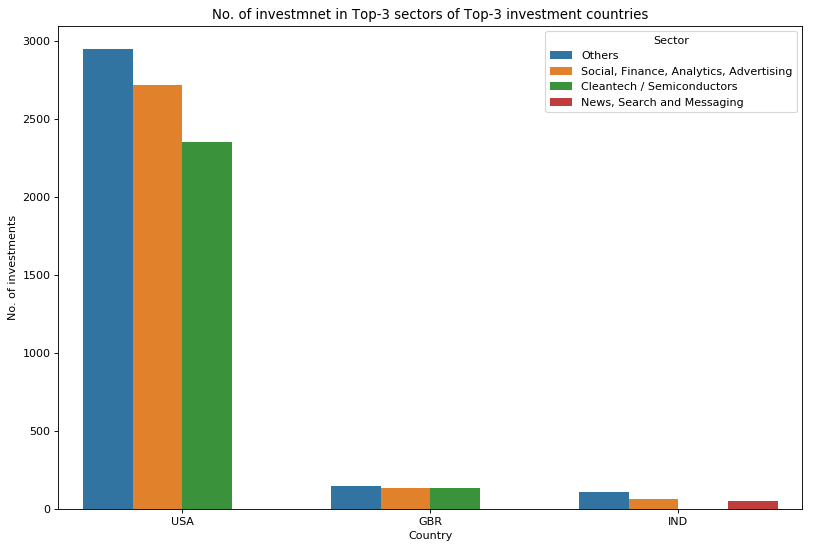

In [39]:
# Create dataframes of top-3 countries comprising of no. of investments in top-3 sectors (in terms of no. of investments)
d1_plot = d1_sectorwise.raised_amount_usd.count().sort_values(ascending = False).head(3).to_frame()
d1_plot.reset_index(level=0, inplace=True)
d1_plot['Country'] = 'USA'
d2_plot = d2_sectorwise.raised_amount_usd.count().sort_values(ascending = False).head(3).to_frame()
d2_plot.reset_index(level=0, inplace=True)
d2_plot['Country'] = 'GBR'
d3_plot = d3_sectorwise.raised_amount_usd.count().sort_values(ascending = False).head(3).to_frame()
d3_plot.reset_index(level=0, inplace=True)
d3_plot['Country'] = 'IND'

# Create a single dataframe with no. of investments in top-3 sectors of all the top-3 countries
plot4_data = d1_plot
plot4_data = plot4_data.append(d2_plot,ignore_index = True)
plot4_data = plot4_data.append(d3_plot,ignore_index = True)
plot4_data = plot4_data.rename(columns={'main_sector':'Sector','raised_amount_usd':'no_of_investments'})

# Plot a bar graph of the No. of investments in the top-3 sectors of top-3 investment countries
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('No. of investmnet in Top-3 sectors of Top-3 investment countries')
plot4 = sns.barplot(x='Country', y='no_of_investments', hue='Sector',data=plot4_data)
plot4.set(xlabel='Country', ylabel='No. of investments')
plt.show()

------------------------------End Of Code--------------------------------------------------------------------------------------